## team_03
# 유방암 데이터 상세 분석
---
- 모든 속성 쌍에 대해 분석을 해보자

In [1]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

Populating the interactive namespace from numpy and matplotlib


In [2]:
print('data =>',cancer.data.shape)
print('target =>',cancer.target.shape)

malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

print('malignant(악성) =>',malignant.shape)
print('benign(양성) =>',benign.shape)

data => (569, 30)
target => (569,)
malignant(악성) => (212, 30)
benign(양성) => (357, 30)


- 평균 0, 표준편차 1 으로 정규화를 적용한다
- 정규화 후 학습용과 테스트용으로 데이터를 나누어 준다

In [11]:
X=cancer.data
y=cancer.target
X_train,X_test,y_train,y_test = train_test_split(X,y)

X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train_scaled = (X_train-X_mean)/X_std
X_test_scaled = (X_test-X_mean)/X_std

print('X_train_scaled =',X_train_scaled.shape)
print('X_test_scaled =',X_test_scaled.shape)

X_train_scaled = (426, 30)
X_test_scaled = (143, 30)


- 속성 하나를 선정한 후, 다른 속성들 간의 분류 결과를 알아보자

In [12]:
col = 9 # (24,20), (20,9) (27,23), (27,20), (1,22)

for i in range(30):
    model = SVC(C=1,gamma=0.1,probability=True)
    model.fit(X_train_scaled[:,[col,i]],y_train)
    result = model.score(X_test_scaled[:,[col,i]],y_test)
    print('score%03d = %f' %(i,result))

score000 = 0.930070
score001 = 0.699301
score002 = 0.937063
score003 = 0.930070
score004 = 0.755245
score005 = 0.930070
score006 = 0.909091
score007 = 0.944056
score008 = 0.664336
score009 = 0.608392
score010 = 0.818182
score011 = 0.608392
score012 = 0.804196
score013 = 0.853147
score014 = 0.608392
score015 = 0.671329
score016 = 0.671329
score017 = 0.755245
score018 = 0.643357
score019 = 0.608392
score020 = 0.951049
score021 = 0.692308
score022 = 0.951049
score023 = 0.958042
score024 = 0.741259
score025 = 0.874126
score026 = 0.909091
score027 = 0.958042
score028 = 0.783217
score029 = 0.762238


- 조금 더 나아가 모든 속성 간에 비교해 보자

In [13]:
best = []

for i in range(30):
    l=[]
    s=[]
    for j in range(30):
        model = SVC(C=1,gamma=0.1,probability=True)
        model.fit(X_train_scaled[:,[i,j]],y_train)
        result = model.score(X_test_scaled[:,[i,j]],y_test)
        l.append((i,j))
        s.append(result)
    pos=s.index(max(s))
    best.append((l[pos][0],l[pos][1],s[pos]))
    print('(%02d,%02d) => %.2f' % (l[pos][0],l[pos][1],s[pos]*100))

(00,27) => 95.10
(01,20) => 95.80
(02,06) => 95.10
(03,27) => 95.10
(04,20) => 94.41
(05,23) => 95.10
(06,20) => 96.50
(07,22) => 95.10
(08,20) => 94.41
(09,23) => 95.80
(10,27) => 94.41
(11,22) => 93.71
(12,27) => 93.01
(13,27) => 95.10
(14,22) => 93.71
(15,07) => 92.31
(16,06) => 95.10
(17,22) => 93.01
(18,07) => 93.01
(19,07) => 93.71
(20,27) => 97.20
(21,20) => 94.41
(22,27) => 96.50
(23,06) => 96.50
(24,20) => 95.80
(25,20) => 95.10
(26,20) => 93.71
(27,20) => 97.20
(28,22) => 95.80
(29,20) => 95.10


- 최상의 결과를 가지고 확률 등고선을 그려보자

C:\Anaconda3\lib\site-packages\numpy\ma\core.py:6447: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Anaconda3\lib\site-packages\numpy\ma\core.py:6447: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


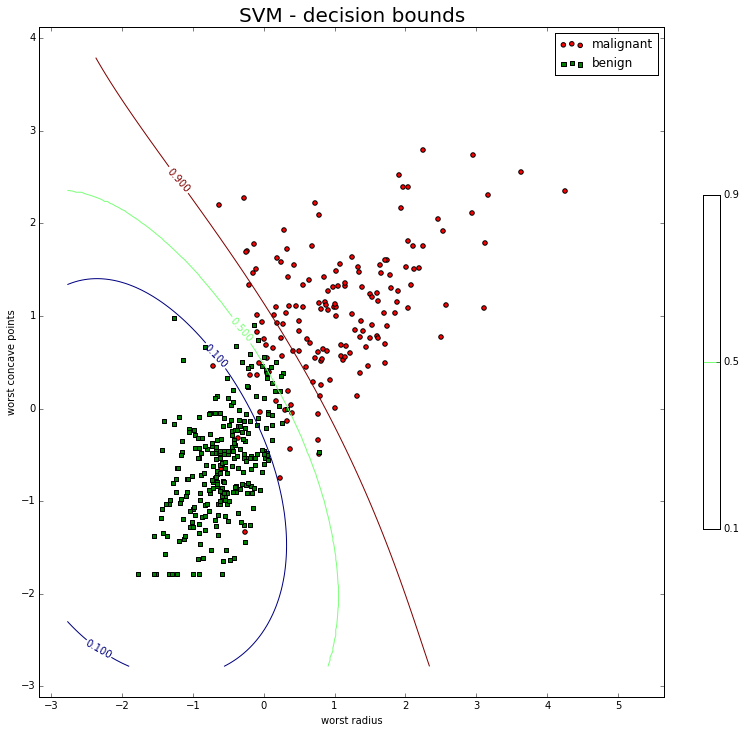

In [15]:
col1 = 20
col2 = 27

model = SVC(C=1, gamma=0.1, probability=True)
model.fit(X_train_scaled[:,[col1,col2]],y_train)

# fit() 결과를 등고선으로 나타낸다
xmax = X_train_scaled[:,col1].max()+1
xmin = X_train_scaled[:,col1].min()-1
ymax = X_train_scaled[:,col2].max()+1
ymin = X_train_scaled[:,col2].min()-1

xx=np.linspace(xmin,xmax,200)
yy=np.linspace(ymin,ymax,200)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
decision_values = model.predict_proba(X_grid)[:,0]

sv=model.support_vectors_

fig=plt.figure(figsize=[14,12])
CS=plt.contour(data1,data2,decision_values.reshape(data1.shape),levels=np.arange(0.1,1,0.4))
plt.clabel(CS, inline=2, fontsize=10)

plt.scatter(X_train_scaled[:,col1][y_train==0],X_train_scaled[:,col2][y_train==0],marker='o',c='r',label='malignant')
plt.scatter(X_train_scaled[:,col1][y_train==1],X_train_scaled[:,col2][y_train==1],marker='s',c='g',label='benign')

plt.legend()
plt.colorbar(CS,shrink=0.5)
plt.xlabel(cancer.feature_names[col1])
plt.ylabel(cancer.feature_names[col2])
plt.title('SVM - decision bounds',fontsize=20)